In [34]:
from turtle import pos
import numpy as np
from scipy.interpolate import RBFInterpolator as RBF
from scipy.interpolate import griddata
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# load data

positions = np.load("rest_position_training.npy")
positions_2D = positions[:, :2]
displacement = np.load("U_training.npy")
interpolate_positions = np.load("rest_position_low.npy")
interpolate_positions_2D = interpolate_positions[:, :2]
target = np.load("U_high.npy")
print(target)

[[ 0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [-2.09566585e+00 -4.58666719e+00  0.00000000e+00]
 [-7.52192352e-01 -5.11109647e+00  0.00000000e+00]
 ...
 [ 9.22505710e-03 -4.72135161e-03  0.00000000e+00]
 [-8.90662006e-01 -4.89681810e+00  0.00000000e+00]
 [ 2.20060940e-02 -1.41591487e-02  0.00000000e+00]]


In [35]:
#print("Positions: ", positions)
#print("Rest position shape: ", self.MO_training.position.value)
displacement_2D = displacement[:, :2]
print("Displacement: ", displacement)

interpolator = RBF(positions_2D, displacement_2D, neighbors=100, kernel="linear")
corrected_displacement = interpolator(interpolate_positions_2D)

print("Corrected displacement: ", corrected_displacement)
#print("Before correction: ", self.MO2.position.value)
corrected_displacement = np.append(corrected_displacement, np.zeros((interpolate_positions.shape[0], 1)), axis=1)
final_displacement = interpolate_positions + corrected_displacement
print("After correction: ", final_displacement)

Displacement:  [[-2.18243315e-03 -1.33637351e-03 -2.29459722e-03]
 [-1.04900254e-01 -6.43065400e-02  4.98220325e-05]
 [-2.02377393e-01 -1.74037288e-01 -2.92500341e-03]
 [-3.08182529e-01 -3.45310665e-01  3.19021475e-03]
 [-4.21582216e-01 -5.71640004e-01  7.59966206e-04]
 [-5.47724227e-01 -8.50011109e-01  1.77154690e-03]
 [-6.85377205e-01 -1.17457259e+00 -2.62429006e-04]
 [-8.37941329e-01 -1.53684529e+00 -1.00823818e-04]
 [-1.00008879e+00 -1.92991598e+00 -8.62973742e-04]
 [-1.17169480e+00 -2.34966222e+00  1.01550994e-03]
 [-1.35358629e+00 -2.79805824e+00 -2.31699226e-03]
 [-1.54955221e+00 -3.26488272e+00 -1.41137652e-03]
 [-1.74095794e+00 -3.74101209e+00  8.23737588e-04]
 [-1.94054036e+00 -4.23452890e+00  1.85473124e-03]
 [-2.13570502e+00 -4.74378731e+00 -6.64578867e-04]
 [ 4.81562223e-04 -2.32523307e-05 -1.34415505e-03]
 [-4.25705582e-02 -4.41163397e-02 -1.78293767e-03]
 [-9.19959765e-02 -1.62649006e-01  4.46768617e-03]
 [-1.55716501e-01 -3.51784439e-01  1.91453565e-03]
 [-2.24530673e-0

(10, 1)
(10, 1)


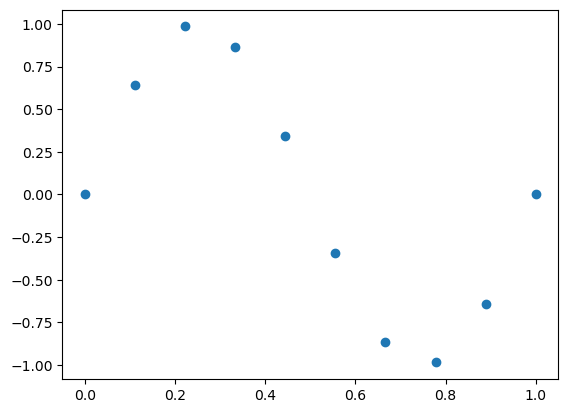

In [36]:
np.random.seed(0)

x = np.linspace(0, 1, 10).reshape(-1, 1)

y = np.sin(2 * np.pi * x).ravel().reshape(-1, 1)


print(x.shape)
print(y.shape)

target = np.linspace(0, 1, 20).reshape(-1, 1)


plt.plot(x, y, 'o')

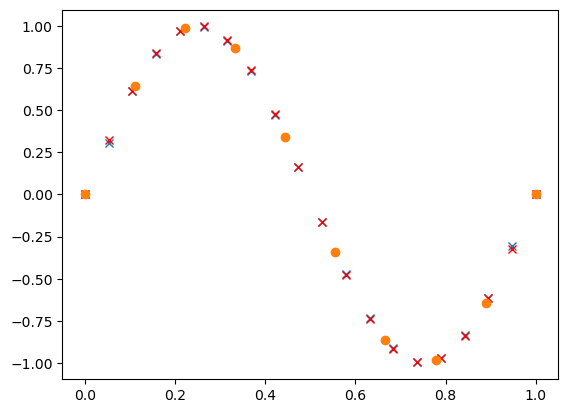

In [37]:
interpolator = RBF(x, y)

plt.plot(target, interpolator(target), 'x')
plt.plot(target, np.sin(2 * np.pi * target), 'x', color='red')
plt.plot(x, y, 'o')
plt.show()

[[ 0.         -1.          0.        ]
 [ 0.71428571 -1.          0.        ]
 [ 1.42857143 -1.          0.        ]
 [ 2.14285714 -1.          0.        ]
 [ 2.85714286 -1.          0.        ]
 [ 3.57142857 -1.          0.        ]
 [ 4.28571429 -1.          0.        ]
 [ 5.         -1.          0.        ]
 [ 5.71428571 -1.          0.        ]
 [ 6.42857143 -1.          0.        ]
 [ 7.14285714 -1.          0.        ]
 [ 7.85714286 -1.          0.        ]
 [ 8.57142857 -1.          0.        ]
 [ 9.28571429 -1.          0.        ]
 [10.         -1.          0.        ]
 [ 0.         -0.5         0.        ]
 [ 0.71428571 -0.5         0.        ]
 [ 1.42857143 -0.5         0.        ]
 [ 2.14285714 -0.5         0.        ]
 [ 2.85714286 -0.5         0.        ]
 [ 3.57142857 -0.5         0.        ]
 [ 4.28571429 -0.5         0.        ]
 [ 5.         -0.5         0.        ]
 [ 5.71428571 -0.5         0.        ]
 [ 6.42857143 -0.5         0.        ]
 [ 7.14285714 -0.5       

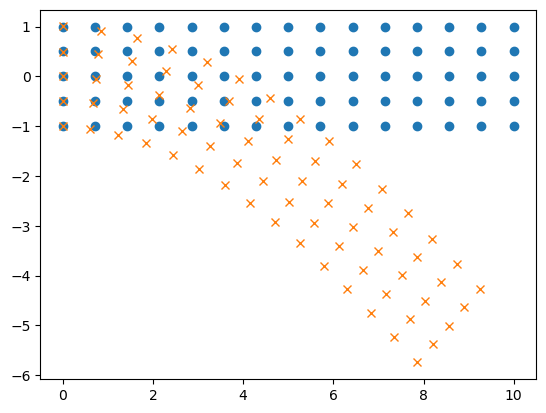

In [72]:
from tkinter import Y


x = np.load("rest_position_training.npy")
y = np.zeros((x.shape[0], 3))
displ = np.load("U_training.npy")
print(x)
for i in range(x.shape[0]):
    y[i, 0] = -np.log(i + 1)

print(x.shape)
print(y.shape)

target = np.load("rest_position_low.npy")

print(target.shape)

X, Y = np.meshgrid(x[:, 0], x[:, 1])

fig = plt.figure()
plt.plot(x[:, 0], x[:, 1], 'o')
plt.plot(x[:, 0]+displ[:, 0], x[:, 1]+displ[:, 1], 'x')
plt.show()



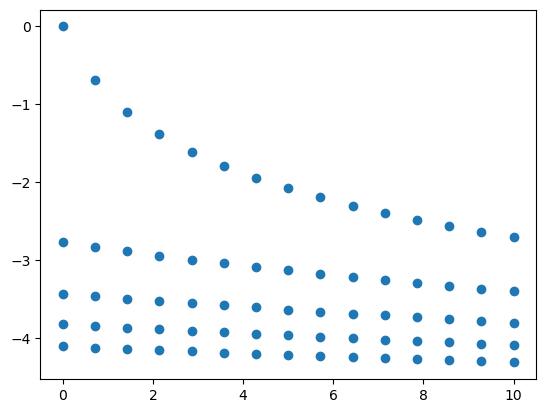

In [68]:
plt.plot(x[:, 0], y[:, 0], 'o')

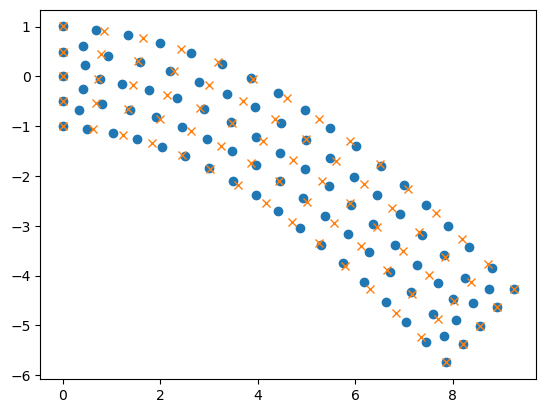

In [76]:


interpolator = RBF(x, displ, neighbors=5, kernel="linear")

plt.plot(target[:, 0]+interpolator(target)[:, 0], target[:, 1]+interpolator(target)[:, 1], 'o')
plt.plot(x[:, 0]+displ[:, 0], x[:, 1]+displ[:, 1], 'x')
